In [1]:
import pandas as pd
import numpy as np
from re import sub
def dollar_string_to_float(money):
        return float(sub(r'[^\d.]', '', money))
    
from datetime import date, timedelta
import datetime
from functools import reduce
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
from Simulations import *

importing Jupyter notebook from Simulations.ipynb


### Company Correlation Matrix

<AxesSubplot:>

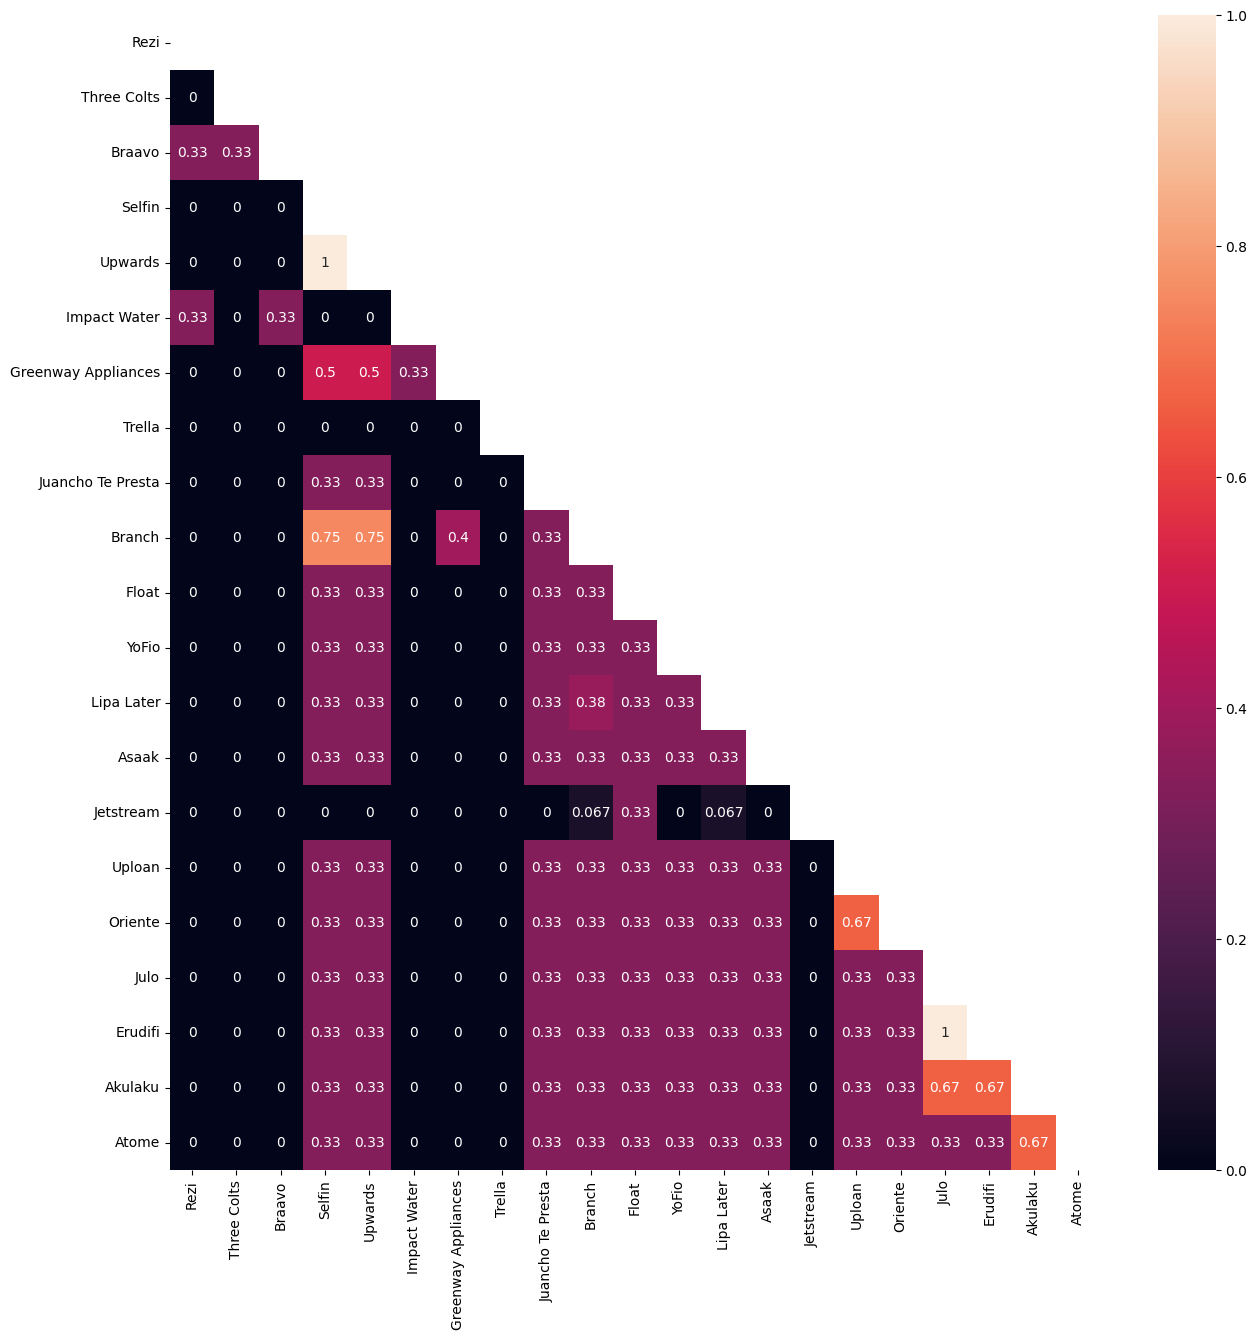

In [2]:
company_info_df = pd.read_csv('company_info.csv') # Load the company info csv
company_correlation_dict = get_company_correlation(company_info_df) # Compute correlation dict


company_correlation_matrix = np.zeros((len(company_info_df),len(company_info_df)))
company_names = company_info_df['Company Name']
for index1,company1 in company_names.items():
    for index2,company2 in company_names.items():
        company_correlation_matrix[index1][index2] = company_correlation_dict[company1.strip().lower()][company2.strip().lower()]

mask = np.triu(np.ones_like(company_correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
        
sns.heatmap(company_correlation_matrix,  # Plot the matrix
        mask=mask, 
        xticklabels=company_info_df['Company Name'],
        yticklabels=company_info_df['Company Name'],
        annot=True,
        ax = ax)

### Pool correlation matrix

<AxesSubplot:>

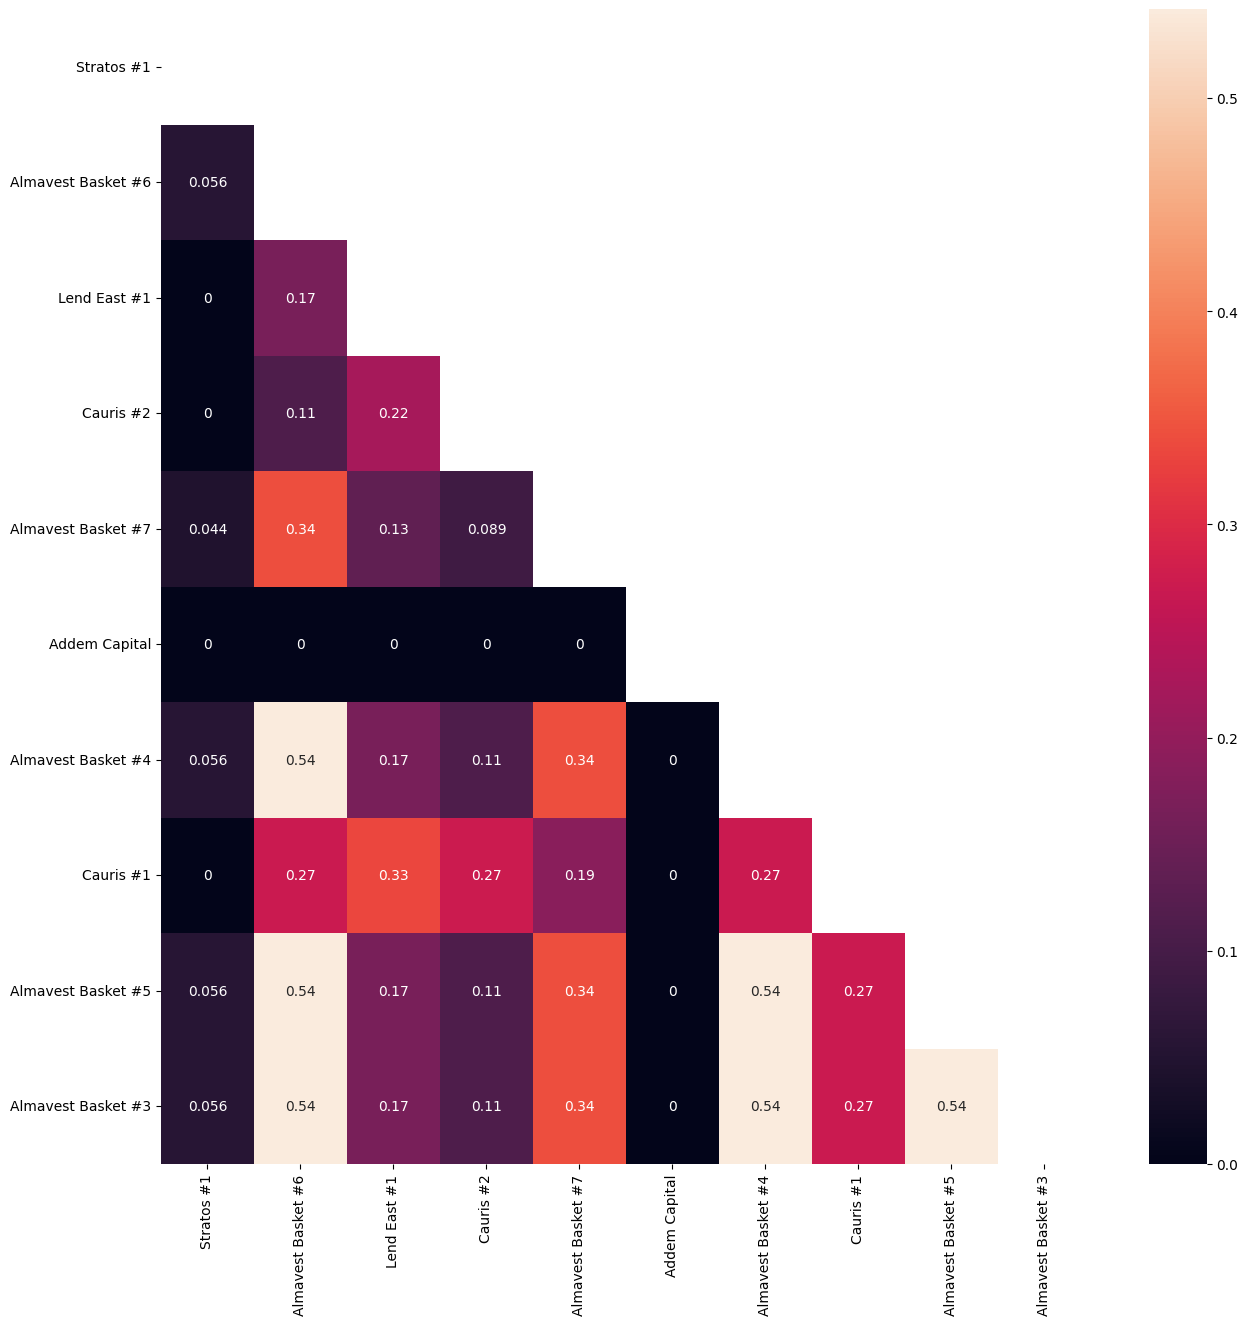

In [3]:
pool_info_df = pd.read_csv('pool_info.csv') # Load pool data
pool_info_df['Borrower Companies'] = pool_info_df['Borrower Companies'].fillna("")
pool_correlation_matrix = get_pool_correlation(pool_info_df,company_correlation_dict) # Compute correlation matrix
np.fill_diagonal(pool_correlation_matrix,1) # Diagonal values should be 1

# Create mask to remove duplications
mask = np.triu(np.ones_like(pool_correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

# plot the heatmap
sns.heatmap(pool_correlation_matrix,
        mask=mask, 
        xticklabels=pool_info_df['Lending Pool Name'],
        yticklabels=pool_info_df['Lending Pool Name'],
        annot=True,
        ax = ax)

### Regime 1 - Pools are assigned a 5% financing rate to model low riskiness

In [4]:
pool_info_array = [] # Initialize the pool info array
pool_info_df = pd.read_csv('pool_info.csv') # Load pool data
pool_info_df['Borrower Companies'] = pool_info_df['Borrower Companies'].fillna("")
for i,row in pool_info_df.iterrows(): # Loop through the pool data
    pool_info_array.append({"name":row["Lending Pool Name"],"principal":dollar_string_to_float(row["Outstanding Loans"]),
                   "maturity_date":datetime.datetime.strptime(row["Full Repayment Due"],"%d %b %Y").date(),"payment_period":float(row["Payment frequency"].split()[0]),
                    "rate":0.05})
            # Append info for each pool

pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

In [5]:
simulation_engine = SimulationEngine(pool_array,pool_correlation_matrix) # Initialize the simulation engine
simulation_engine.simulate_paths(pool_array[-1].maturity_date,50000) # Run simulations till 
                                                    # maturity date of the last pool for 10000 paths
    
# More is the number of paths more will be the time taken and less noisier will be the results

NameError: name 'pool_array' is not defined

In [ ]:
analysisEngine = AnalysisEngine(simulation_engine) # Initialize analysis engine
initial_investment = [100 for _ in range(len(pool_array))]
analysisEngine.visualize_capital_losses(initial_investment)

: 

### Regime 2 - Pools are assigned their real world financing rates.

In [ ]:
pool_info_array = [] # Initialize the pool info array
pool_info_df = pd.read_csv('pool_info.csv') # Load pool data
pool_info_df['Borrower Companies'] = pool_info_df['Borrower Companies'].fillna("")
for i,row in pool_info_df.iterrows(): # Loop through the pool data
    pool_info_array.append({"name":row["Lending Pool Name"],"principal":dollar_string_to_float(row["Outstanding Loans"]),
                   "maturity_date":datetime.datetime.strptime(row["Full Repayment Due"],"%d %b %Y").date(),"payment_period":float(row["Payment frequency"].split()[0]),
                    "rate":float(row["Financing Cost"].split("%")[0])/100 })
            # Append info for each pool

pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

: 

In [ ]:
simulation_engine = SimulationEngine(pool_array,pool_correlation_matrix) # Initialize the simulation engine
simulation_engine.simulate_paths(pool_array[-1].maturity_date,50000) # Run simulations till 
                                                    # maturity date of the last pool for 10000 paths
    
# More is the number of paths more will be the time taken and less noisier will be the results

: 

In [ ]:
analysisEngine = AnalysisEngine(simulation_engine) # Initialize analysis engine
initial_investment = [100 for _ in range(len(pool_array))]
analysisEngine.visualize_capital_losses(initial_investment)

: 

### Regime 3 - Pools are assigned their double real world financing rates.

In [ ]:
pool_info_array = [] # Initialize the pool info array
pool_info_df = pd.read_csv('pool_info.csv') # Load pool data
pool_info_df['Borrower Companies'] = pool_info_df['Borrower Companies'].fillna("")
for i,row in pool_info_df.iterrows(): # Loop through the pool data
    pool_info_array.append({"name":row["Lending Pool Name"],"principal":dollar_string_to_float(row["Outstanding Loans"]),
                   "maturity_date":datetime.datetime.strptime(row["Full Repayment Due"],"%d %b %Y").date(),"payment_period":float(row["Payment frequency"].split()[0]),
                    "rate":float(row["Financing Cost"].split("%")[0])/100*2 })
            # Append info for each pool

pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

: 

In [ ]:
simulation_engine = SimulationEngine(pool_array,pool_correlation_matrix) # Initialize the simulation engine
simulation_engine.simulate_paths(pool_array[-1].maturity_date,50000) # Run simulations till 
                                                    # maturity date of the last pool for 10000 paths
    
# More is the number of paths more will be the time taken and less noisier will be the results

: 

In [ ]:
analysisEngine = AnalysisEngine(simulation_engine) # Initialize analysis engine
initial_investment = [100 for _ in range(len(pool_array))]
analysisEngine.visualize_capital_losses(initial_investment)

: 